In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, os
from scipy.interpolate import griddata
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.mplot3d import Axes3D
# %matplotlib widget

In [2]:
datalocation = 'closedRoom_30um'
dx = 0.25
savecsv = False

In [3]:
foldername = '../'+ datalocation + '/Plane Output'

In [15]:
timestep = 1800

In [16]:
filename = foldername + '/planeoutput-' + str(float(timestep))

array = []
with open(filename,'r') as file:
    count=0
    for lines in file:
        count+=1
        if count>1:
            array.append(lines.split())
        else:
            indices = lines.split()

array = np.array(array).astype('float')

print('File has the following variables:')
for i,v in enumerate(indices):
    print(i, '-', v, '-', array[0,i])

File has the following variables:
0 - nodenumber - 1.0
1 - x-coordinate - 0.0
2 - y-coordinate - 0.0
3 - z-coordinate - 0.0
4 - x-velocity - 0.0
5 - y-velocity - 0.0
6 - z-velocity - 0.0
7 - total-temperature - 294.1685929
8 - dpm-concentration - 0.0
9 - num-virions-inhaled - 0.5154731495
10 - cell-volume - 0.002601191859


In [91]:
magnitude = array[:,8]

mag_max = np.amax(magnitude)
mag_min = np.amin(magnitude)

alpha = (magnitude - mag_min)/(mag_max - mag_min)
s = alpha*10

In [93]:
magnitude = array[:,7]

s = 2
alpha = 1

Text(0.5, 0.92, 'Raw CFD data before interpolation')

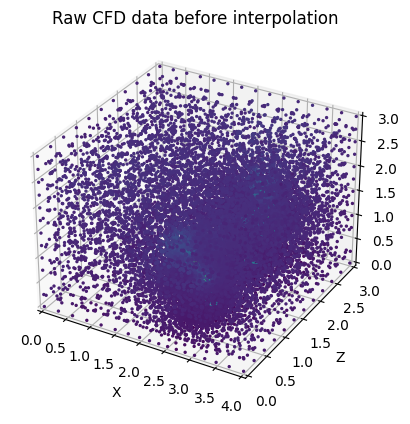

In [94]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(array[:,1],array[:,3],array[:,2],s=s,c=magnitude,alpha=alpha,cmap='viridis')
ax.set_xlim([0,4])
ax.set_ylim([0,3])
ax.set_zlim([0,3])
ax.set_xlabel('X')
ax.set_ylabel('Z')
ax.set_zlabel('Y')
ax.set_title('Raw CFD data before interpolation')

In [59]:
x = array[:,1]
y = array[:,2]
z = array[:,3]
xvelocity = array[:,4]
yvelocity = array[:,5]
zvelocity = array[:,6]
temperature = array[:,7]
dpm_concentration = array[:,8]
nvirions = array[:,9]
cell_vol = array[:,10]

exposure = [nvirions[i]/cell_vol[i] for i in range(len(nvirions))]
k = 410
power = -1/k * exposure
prob_inf = 1 - np.exp(power)

In [60]:
p = 4.0 + 1e-10
q = 3.0 + 1e-10
r = 3.0 + 1e-10

grid_x, grid_y, grid_z = np.mgrid[dx/2:p-dx/2:dx, dx/2:q-dx/2:dx, dx/2:r-dx/2:dx]

grid_u = griddata((x, y, z), xvelocity, (grid_x, grid_y, grid_z), method='linear')
grid_v = griddata((x, y, z), yvelocity, (grid_x, grid_y, grid_z), method='linear')
grid_w = griddata((x, y, z), zvelocity, (grid_x, grid_y, grid_z), method='linear')
grid_t = griddata((x, y, z), temperature, (grid_x, grid_y, grid_z), method='linear')
grid_d = griddata((x, y, z), dpm_concentration, (grid_x, grid_y, grid_z), method='linear')
grid_n = griddata((x, y, z), nvirions, (grid_x, grid_y, grid_z), method='linear')
grid_e = griddata((x, y, z), exposure, (grid_x, grid_y, grid_z), method='linear')
grid_p = griddata((x, y, z), prob_inf, (grid_x, grid_y, grid_z), method='linear')

grid_u[np.isnan(grid_u)] = 0
grid_v[np.isnan(grid_v)] = 0
grid_w[np.isnan(grid_w)] = 0
grid_t[np.isnan(grid_t)] = 294
grid_d[np.isnan(grid_d)] = 0
grid_n[np.isnan(grid_n)] = 0
grid_e[np.isnan(grid_e)] = 0
grid_p[np.isnan(grid_p)] = 0

In [61]:
xcoord = grid_x.flatten()
ycoord = grid_y.flatten()
zcoord = grid_z.flatten()
x_vel = grid_u.flatten()
y_vel = grid_v.flatten()
z_vel = grid_w.flatten()
ttemp = grid_t.flatten()
dpm_c = grid_d.flatten()
nv_in = grid_n.flatten()
exp_c = grid_e.flatten()
probc = grid_p.flatten()

In [62]:
s = 10
alpha = 1

In [66]:
magnitude = ttemp

mag_max = np.amax(magnitude)
mag_min = np.amin(magnitude)

alpha = (magnitude - mag_min)/(mag_max - mag_min)
s = alpha*10

Text(0.5, 0.92, 'Raw CFD data after interpolation')

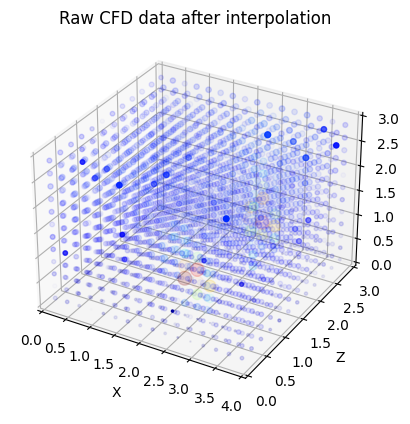

In [64]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(xcoord,zcoord,ycoord,s=s,c=magnitude,alpha=alpha,cmap='jet')
ax.set_xlim([0,4])
ax.set_ylim([0,3])
ax.set_zlim([0,3])
ax.set_xlabel('X')
ax.set_ylabel('Z')
ax.set_zlabel('Y')
ax.set_title('Raw CFD data after interpolation')

In [73]:
yplane = 1.25

In [82]:
plane_x = []
plane_z = []
plane_d = []
plane_n = []
plane_p = []
plane_e = []

for i,v in enumerate(y):
    if v>yplane-0.25 and v<yplane+0.25:
        plane_x.append(x[i])
        plane_z.append(z[i])
        plane_d.append(dpm_concentration[i])
        plane_n.append(nvirions[i])
        plane_e.append(exposure[i])
        plane_p.append(prob_inf[i]*100)

plane_x = np.array(plane_x)
plane_z = np.array(plane_z)
plane_d = np.array(plane_d)
plane_n = np.array(plane_n)
plane_e = np.array(plane_e)
plane_p = np.array(plane_p)

m = 4.0 + 1e-10
n = 3.0 + 1e-10
dx = 0.1
grid_x, grid_z = np.mgrid[dx/2:m-dx/2:dx, dx/2:n-dx/2:dx]
grid_n = griddata((plane_x, plane_z), plane_n, (grid_x, grid_z), method='linear')
grid_d = griddata((plane_x, plane_z), plane_d, (grid_x, grid_z), method='linear')
grid_e = griddata((plane_x, plane_z), plane_e, (grid_x, grid_z), method='linear')
grid_p = griddata((plane_x, plane_z), plane_p, (grid_x, grid_z), method='linear')
grid_n[np.isnan(grid_n)] = 0
grid_d[np.isnan(grid_d)] = 0
grid_e[np.isnan(grid_e)] = 0
grid_p[np.isnan(grid_p)] = 0


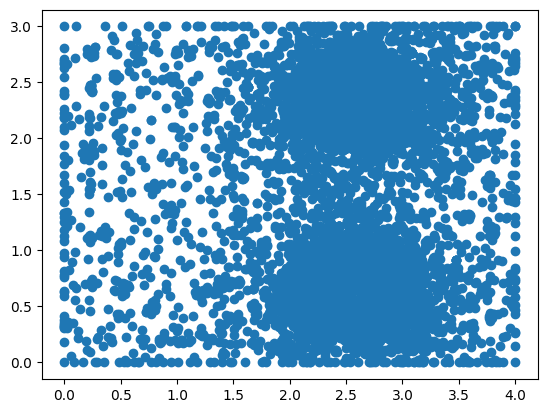

In [86]:
fig,ax = plt.subplots()
ax.scatter(plane_x,plane_z)

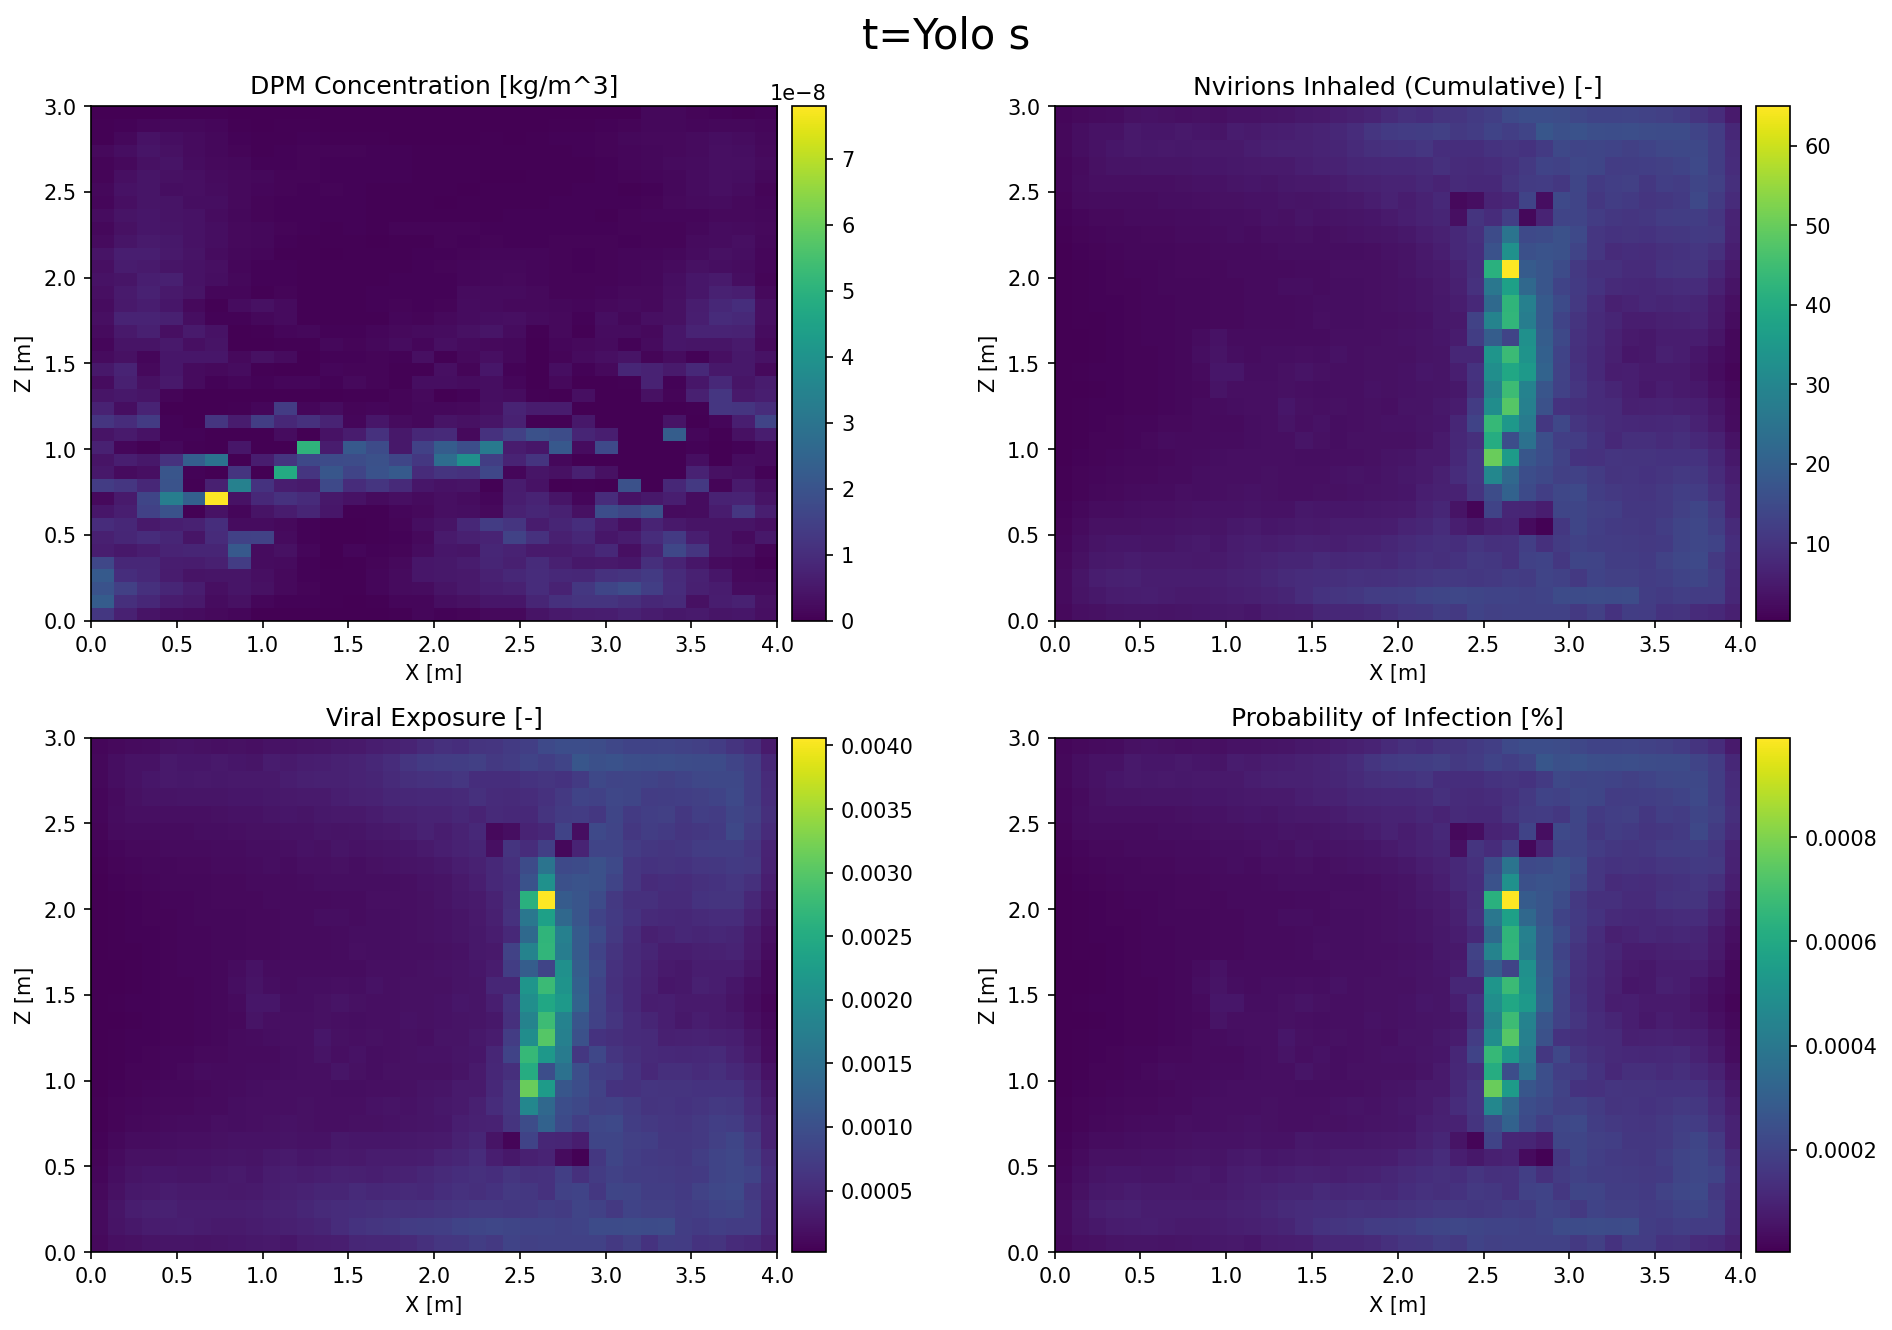

In [84]:
fig,axs = plt.subplots(2,2,figsize = (13,9), dpi=150)

axs = axs.flatten()

im1 = axs[0].imshow(grid_d,extent=[0,m,0,n])
axs[0].set_xlabel('X [m]')
axs[0].set_ylabel('Z [m]')
axs[0].set_title('DPM Concentration [kg/m^3]')
divider = make_axes_locatable(axs[0])
cax = divider.append_axes("right", size="5%", pad=0.1)
plt.colorbar(im1, cax=cax)

im2 = axs[1].imshow(grid_n.T,extent=[0,m,0,n])
axs[1].set_xlabel('X [m]')
axs[1].set_ylabel('Z [m]')
axs[1].set_title('Nvirions Inhaled (Cumulative) [-]')
divider = make_axes_locatable(axs[1])
cax = divider.append_axes("right", size="5%", pad=0.1)
plt.colorbar(im2, cax=cax)

im3 = axs[2].imshow(grid_e.T,extent=[0,m,0,n])
axs[2].set_xlabel('X [m]')
axs[2].set_ylabel('Z [m]')
axs[2].set_title('Viral Exposure [-]')
divider = make_axes_locatable(axs[2])
cax = divider.append_axes("right", size="5%", pad=0.1)
plt.colorbar(im3, cax=cax)

im4 = axs[3].imshow(grid_p.T,extent=[0,m,0,n])
axs[3].set_xlabel('X [m]')
axs[3].set_ylabel('Z [m]')
axs[3].set_title('Probability of Infection [%]')
divider = make_axes_locatable(axs[3])
cax = divider.append_axes("right", size="5%", pad=0.1)
plt.colorbar(im4, cax=cax)

# plt.suptitle('t=Yolo s', fontsize = 20)
plt.tight_layout()